<a href="https://colab.research.google.com/github/tae-create/AI-Coursework-2025-/blob/main/Mail_Customers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
print("Libraries have been imported successfullyyyy")

Libraries have been imported successfullyyyy


In [6]:
df=pd.read_csv('/content/Mall_Customers.csv')
print("Dataset loaded successfully")
print("\nFirst 5 rows")
print(df.head())

Dataset loaded successfully

First 5 rows
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
print("DATA CLEANING")
print("Dataset info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nDuplicate values:")
print(df.duplicated().sum())
print("\nBasic Statistics")
print(df.describe())

DATA CLEANING
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicate values:
0

Basic Statistics
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185 

Exploratory data analysis


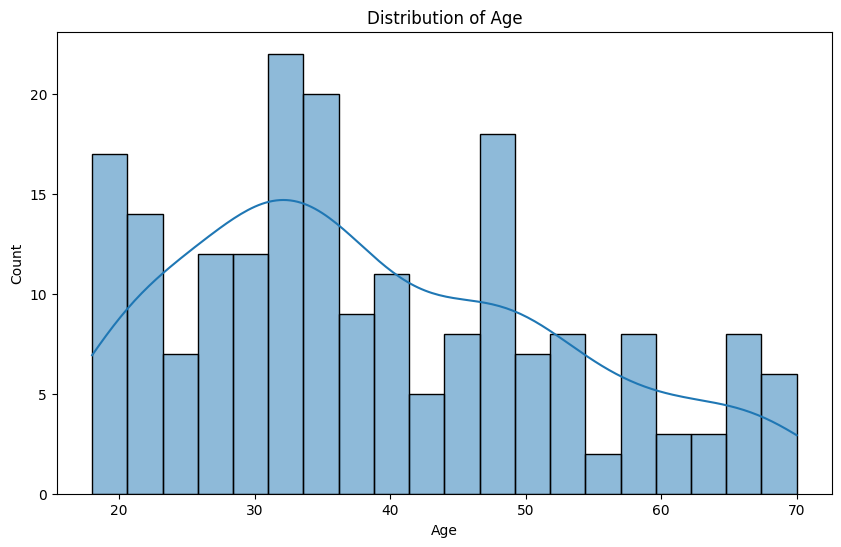

Insight 1: Most customers are between 30 to 40 years


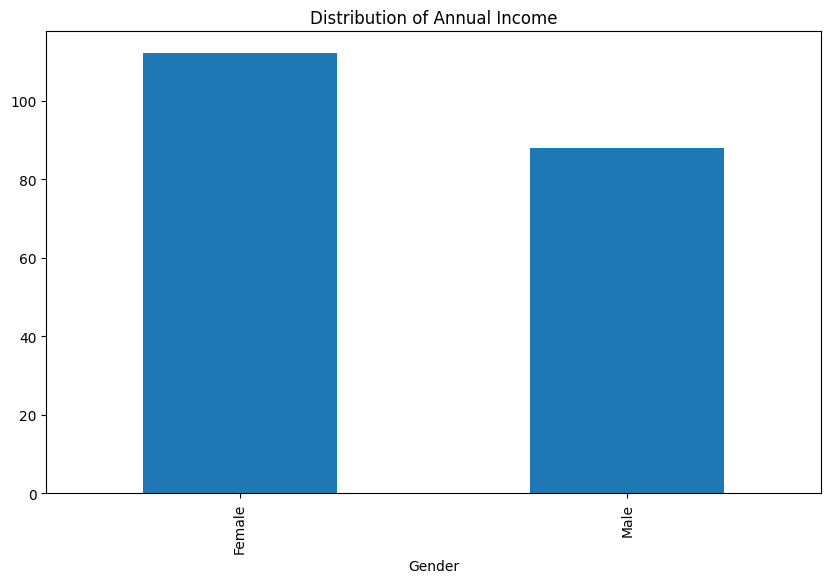

Insight 2: Females are slightly more than males


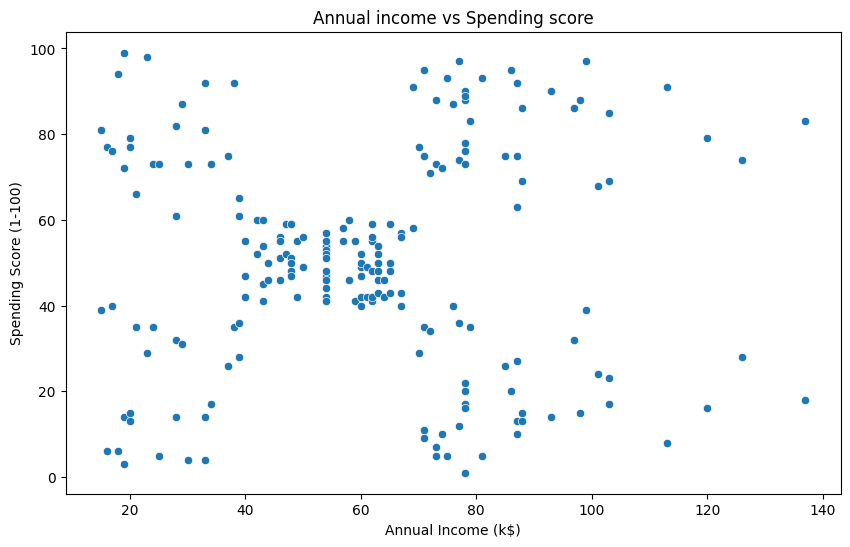

Insight 3: No clear relationship between income and spending score


In [8]:
print("Exploratory data analysis")
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],bins=20,kde=True)
plt.title('Distribution of Age')
plt.show()
print("Insight 1: Most customers are between 30 to 40 years")

plt.figure(figsize=(10,6))
df['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Annual Income')
plt.show()
print("Insight 2: Females are slightly more than males")

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')
plt.title('Annual income vs Spending score')
plt.show()
print("Insight 3: No clear relationship between income and spending score")

K MEANS WITH 1 FEATURE


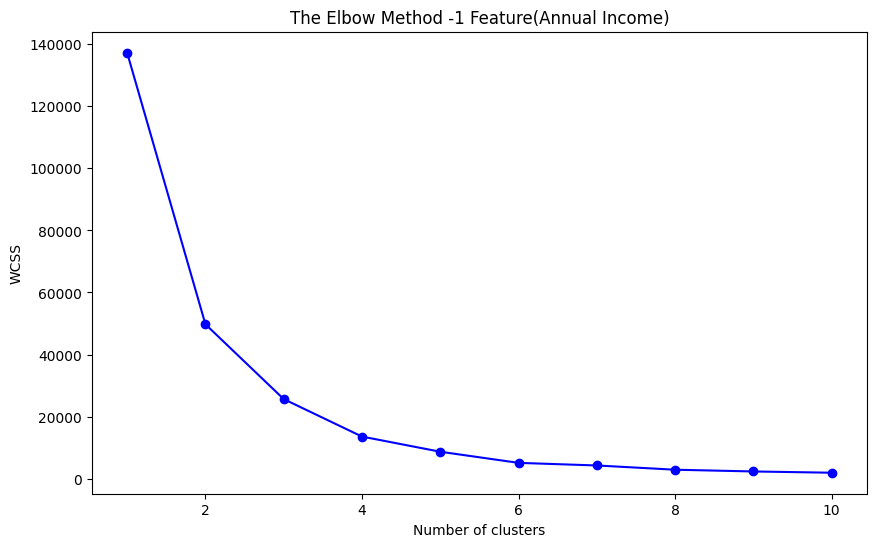

Kmeans clustering with 1 feature done


In [11]:
print("K MEANS WITH 1 FEATURE")
X1=df[['Annual Income (k$)']]
wcss=[]
k_range=range(1,11)
for k in k_range:
  kmeans=KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(k_range,wcss,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method -1 Feature(Annual Income)')
plt.show()
kmeans1 = KMeans(n_clusters=5, random_state=42)
df['Cluster_1feature']= kmeans.fit_predict(X1)
print("Kmeans clustering with 1 feature done")

Calculating silhouette scores


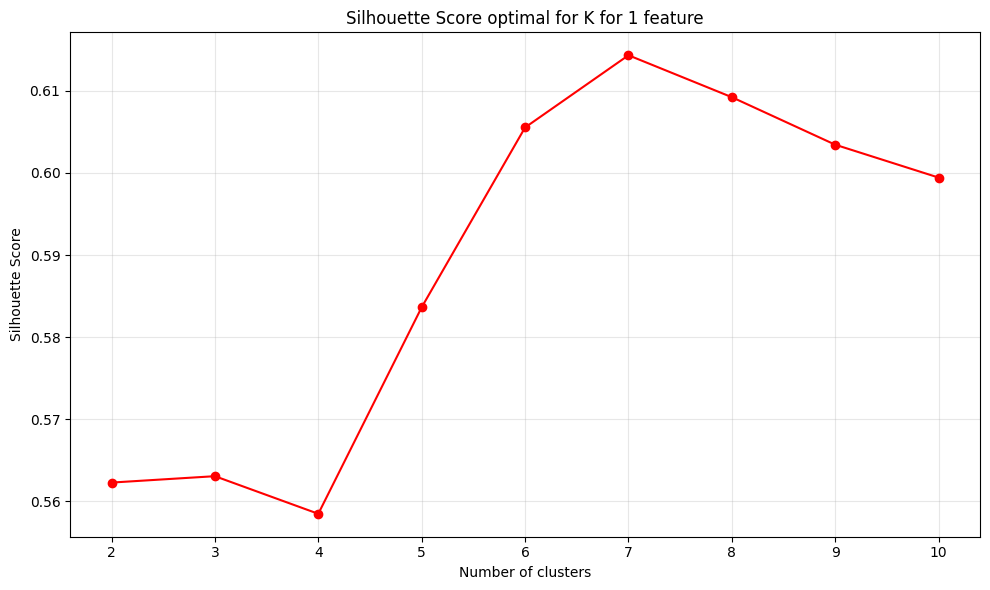


 Optimal clusters analysis:
Elbow method suggests: k=3
Silhouette method suggests: k=7
Selected k for clustering: 3

 Applying K-means with k=3

 Cluster analysis (1 feature)
                  Annual Income (k$)  Spending Score (1-100)  Gender
Cluster_1feature                                                    
0                          75.400000               49.925000      40
1                          26.714286               49.785714      14
2                         102.000000               53.000000      14
3                          46.545455               51.409091      22
4                          63.312500               49.937500      32
5                         127.666667               49.666667       6
6                          55.333333               50.277778      18
7                          87.625000               48.937500      16
8                          37.500000               49.850000      20
9                          18.333333               49.555556     

In [13]:
print("Calculating silhouette scores")
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X1)
    silhouette_avg = silhouette_score(X1, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10,6))
plt.plot(range(2,11),silhouette_scores,'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score optimal for K for 1 feature')
plt.grid(True,alpha=0.3)
plt.tight_layout()
plt.show()

optimal_k_elbow =3
optimal_k_silhouette= range(2,11)[np.argmax(silhouette_scores)]
print(f"\n Optimal clusters analysis:")
print(f"Elbow method suggests: k={optimal_k_elbow}")
print(f"Silhouette method suggests: k={optimal_k_silhouette}")

final_k=optimal_k_elbow
print(f"Selected k for clustering: {final_k}")
print(f"\n Applying K-means with k={final_k}")
kmeans_1feature=KMeans(n_clusters=final_k,random_state=42, n_init=10)
df['Cluster_1feature']=kmeans.fit_predict(X1)
print("\n Cluster analysis (1 feature)")
cluster_summary_1f=df.groupby('Cluster_1feature').agg({'Annual Income (k$)':'mean','Spending Score (1-100)':'mean','Gender':'count'})
print(cluster_summary_1f)

In [14]:
print("K means with 2 features")
X2=df[['Annual Income (k$)','Spending Score (1-100)']]
print(f"Selected featuress: Annual income(k$) and spending score(1-100)")
print(f"Data shape for clustering: {X2.shape}")
print("\n Standardizing data")
scaler=StandardScaler()
X2_scaled=scaler.fit_transform(X2)
print("Data has been standardized")
print("\n Finding optimal clusters using elbow method")
wcss_2f=[]
k_range=range(1,11)
for k in k_range:
  kmeans=KMeans(n_clusters=k, random_state=42,n_init=10)
  kmeans.fit(X2_scaled)
  wcss_2f.append(kmeans.inertia_)
  print("Calculating silhouette scores")
  silhouette_scores_2f=[]
  for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    cluster_labels=kmeans.fit_predict(X2_scaled)
    silhouette_avg=silhouette_score(X2_scaled,cluster_labels)
    silhouette_scores_2f.append(silhouette_avg)
    optimal_k_elbow_2f=5
    optimal_k_silhouette_2f=range(2,11)[np.argmax(silhouette_scores_2f)]
    print(f"\n Optimal clusters analysis:")
    print(f"Elbow method suggests: k={optimal_k_elbow_2f}")
    print(f"Silhouette method suggests: k={optimal_k_silhouette_2f}")
    final_k_2f=optimal_k_elbow_2f
    print(f"Selected k for clustering: {final_k_2f}")
    print(f"\n Applying K-means with k={final_k_2f}")
    kmeans_2f=KMeans(n_clusters=final_k_2f,random_state=42,n_init=10)
    df['Cluster_2features']=kmeans_2f.fit_predict(X2_scaled)
    print("\n Cluster analysis (2 features)")
    cluster_summary_2f=df.groupby('Cluster_2features').agg({'Annual Income (k$)':'mean','Spending Score (1-100)':'mean','Gender':'count'})
    print(cluster_summary_2f)
    print(f"\n 3b done customers segmented into {final_k_2f} clusters")


K means with 2 features
Selected featuress: Annual income(k$) and spending score(1-100)
Data shape for clustering: (200, 2)

 Standardizing data
Data has been standardized

 Finding optimal clusters using elbow method
Calculating silhouette scores

 Optimal clusters analysis:
Elbow method suggests: k=5
Silhouette method suggests: k=2
Selected k for clustering: 5

 Applying K-means with k=5

 Cluster analysis (2 features)
                   Annual Income (k$)  Spending Score (1-100)  Gender
Cluster_2features                                                    
0                           55.296296               49.518519      81
1                           86.538462               82.128205      39
2                           25.727273               79.363636      22
3                           88.200000               17.114286      35
4                           26.304348               20.913043      23

 3b done customers segmented into 5 clusters

 Optimal clusters analysis:
Elbow meth

VISUALISATION AND COMPARISON


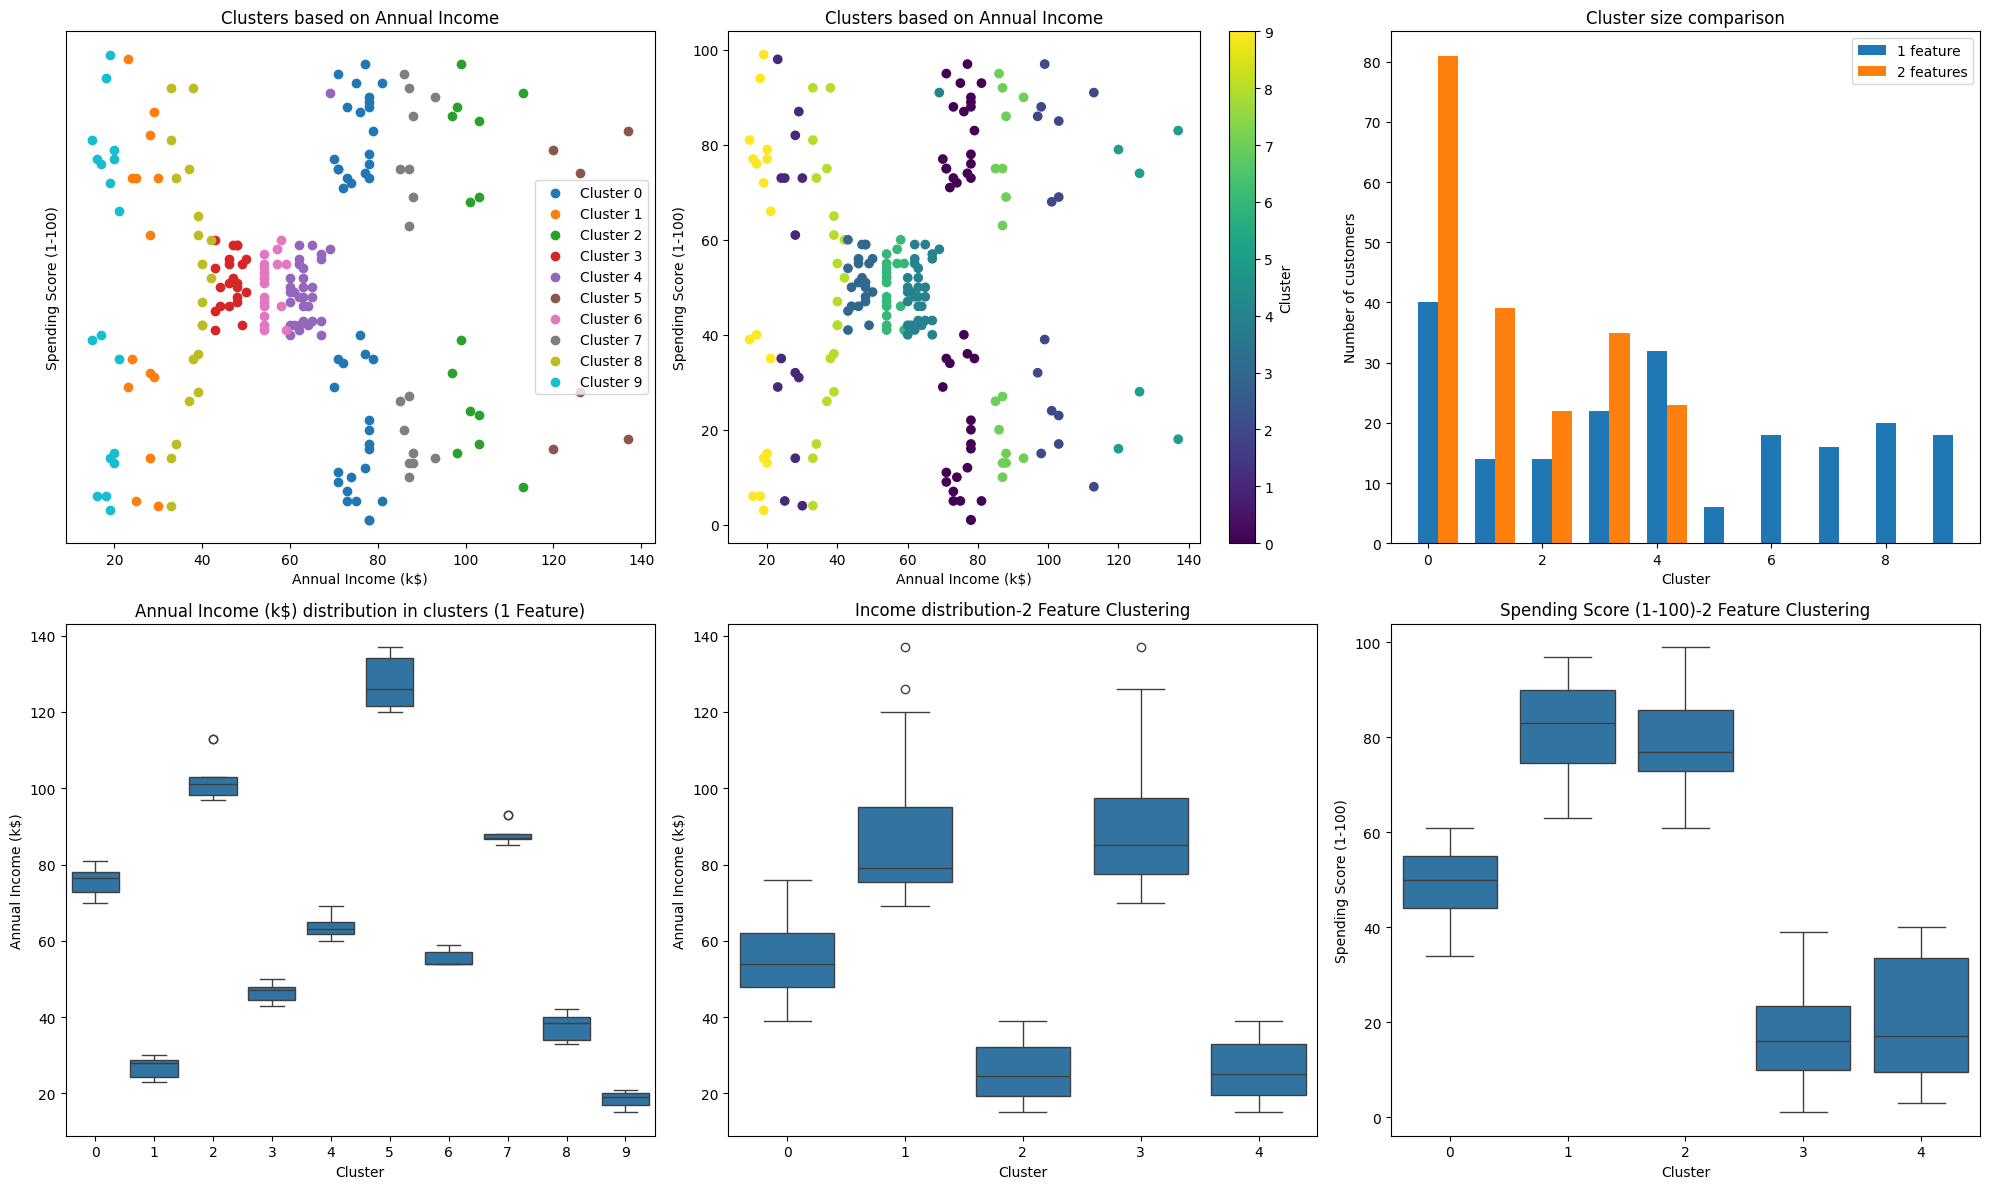

In [18]:
print("VISUALISATION AND COMPARISON")
plt.figure(figsize=(20,12))

# Scatter plot for 1 feature clustering
plt.subplot(2,3,1)
for cluster in sorted(df['Cluster_1feature'].unique()):
  cluster_data=df[df['Cluster_1feature']==cluster]
  plt.scatter(cluster_data['Annual Income (k$)'],cluster_data['Spending Score (1-100)'],label=f'Cluster {cluster}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters based on Annual Income')
plt.legend()
plt.yticks([])

# Scatter plot for 1 feature clustering with color mapping
plt.subplot(2,3,2)
scatter=plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=df['Cluster_1feature'],cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters based on Annual Income')
plt.colorbar(scatter, label='Cluster')

# Cluster size comparison
plt.subplot(2,3,3)
cluster_sizes_1f=df['Cluster_1feature'].value_counts().sort_index()
cluster_sizes_2f=df['Cluster_2features'].value_counts().sort_index()
x=np.arange(len(cluster_sizes_1f))
width=0.35
plt.bar(x,cluster_sizes_1f,width,label='1 feature')
plt.bar(x[:len(cluster_sizes_2f)]+width,cluster_sizes_2f,width,label='2 features')
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.title('Cluster size comparison')
plt.legend()

# Boxplot for Annual Income (1 feature)
plt.subplot(2,3,4)
sns.boxplot(data=df, x='Cluster_1feature',y='Annual Income (k$)')
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')
plt.title('Annual Income (k$) distribution in clusters (1 Feature)')

# Boxplot for Annual Income (2 features)
plt.subplot(2,3,5)
sns.boxplot(data=df,x='Cluster_2features',y='Annual Income (k$)')
plt.title('Income distribution-2 Feature Clustering')
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)') # Corrected ylabel

# Boxplot for Spending Score (2 features)
plt.subplot(2,3,6)
sns.boxplot(data=df,x='Cluster_2features',y='Spending Score (1-100)')
plt.title('Spending Score (1-100)-2 Feature Clustering')
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

In [19]:
print("Cluster comparison ")
print("\n 1 feature clustering summary")
cluster_stats_1f=df.groupby('Cluster_1feature').agg({'Annual Income (k$)':'mean','Spending Score (1-100)':'mean','Gender':'count'})
print(cluster_stats_1f)
print("\n 2 feature clustering summary")
cluster_stats_2f=df.groupby('Cluster_2features').agg({'Annual Income (k$)':'mean','Spending Score (1-100)':'mean','Gender':'count'})
print(cluster_stats_2f)

Cluster comparison 

 1 feature clustering summary
                  Annual Income (k$)  Spending Score (1-100)  Gender
Cluster_1feature                                                    
0                          75.400000               49.925000      40
1                          26.714286               49.785714      14
2                         102.000000               53.000000      14
3                          46.545455               51.409091      22
4                          63.312500               49.937500      32
5                         127.666667               49.666667       6
6                          55.333333               50.277778      18
7                          87.625000               48.937500      16
8                          37.500000               49.850000      20
9                          18.333333               49.555556      18

 2 feature clustering summary
                   Annual Income (k$)  Spending Score (1-100)  Gender
Cluster_2features   

COMPARISON COMMENTS


1. 1-FEATURE CLUSTERING (Income Only):
   • Clusters are based solely on income levels
   • Creates horizontal segmentation (low, medium, high income groups)
   • Simple but limited - doesn't consider spending behavior
   • Useful for basic income-based targeting

2. 2-FEATURE CLUSTERING (Income + Spending):
   • Creates more nuanced customer segments
   • Identifies distinct behavioral patterns:
     - High income, high spending (premium customers)
     - High income, low spending (budget-conscious)
     - Low income, high spending (enthusiasts)
     - Low income, low spending (cautious shoppers)
     - Moderate income & spending (average customers)
   • Provides richer insights for targeted marketing

3. DISTRIBUTION DIFFERENCES:
   • 1-feature: Even distribution across income brackets
   • 2-feature: Natural grouping based on both financial capacity and spending behavior
   • 2-feature approach reveals customer segments that wouldn't be visible with income alone

4. BUSINESS VALUE:
   • 1-feature: Good for basic income-based promotions
   • 2-feature: Enables personalized marketing strategies for different customer types

The mall's customer base is segmented into five distinct groups, each requiring a tailored approach for effective engagement.

The two segments with High Annual Income require different, strategic interactions:

Target/Best Customers (High Income, High Spending) should be targeted with VIP Programs and Exclusive Events to ensure retention and leverage their advocacy. Conversely

Miser/Cautious High-Income segment (High Income, Low Spending) needs to be reassured of the purchasing decision through marketing that emphasizes Value, Quality, and strong Guarantees to unlock their potential spending.

The rest are more focused on volume and deals.

Standard/Average customers (Medium Income, Medium Spending), should be engaged through Standard Loyalty programs and Variety Promotions to encourage slight increases in frequency and basket size.

 Spendthrift/Impulse Buyers (Low Income, High Spending) are motivated by immediate gratification, making Flash Sales and Trend-Focused Content the best way to drive quick purchases.

Highly price-sensitive Frugal/Standard Budgeters (Low Income, Low Spending) should be drawn to the mall by promoting Extreme Value offers and Free/Low-Cost Entertainment to increase their overall visit frequency.